In [64]:
import glob, os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import copy
from collections import Counter

In [65]:
def num2key(string): #gives the equivalent of the number in the key of C
    return (string.replace('10','A#')
            .replace('1','C#')
            .replace('3','D#')
            .replace('6','F#')
            .replace('8','G#')
            .replace('9','A')
            .replace('11','B')
            .replace('0','C')
            .replace('2','D')
            .replace( '4','E')
            .replace('5','F')
            .replace('7','G'))

In [66]:
# Loading the data from the pre-processing part
clean_data = np.load('../dataset/clean_data.npy')

In [67]:
c_bi = Counter(bigrams)
len(c_bi.most_common(20))

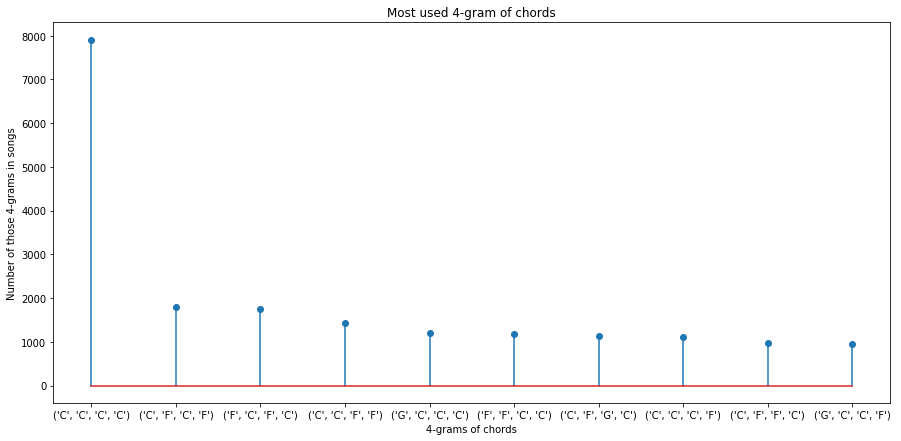

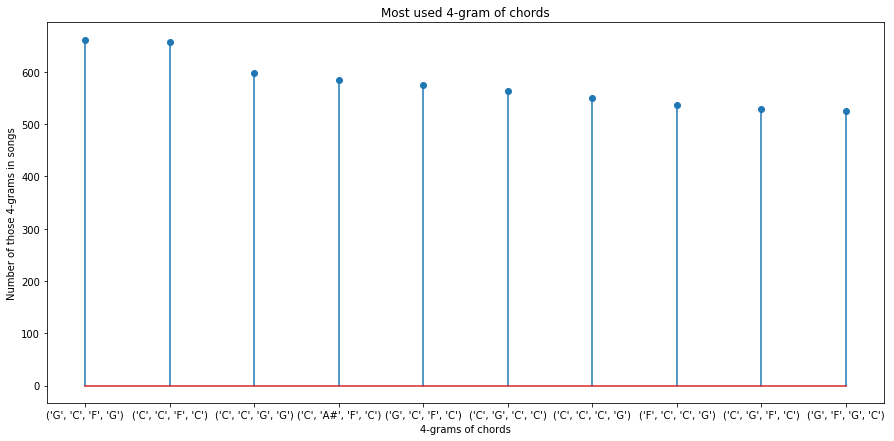

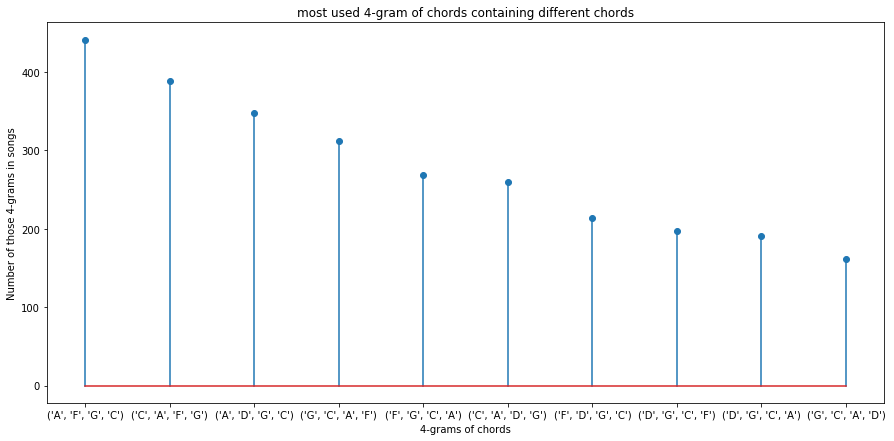

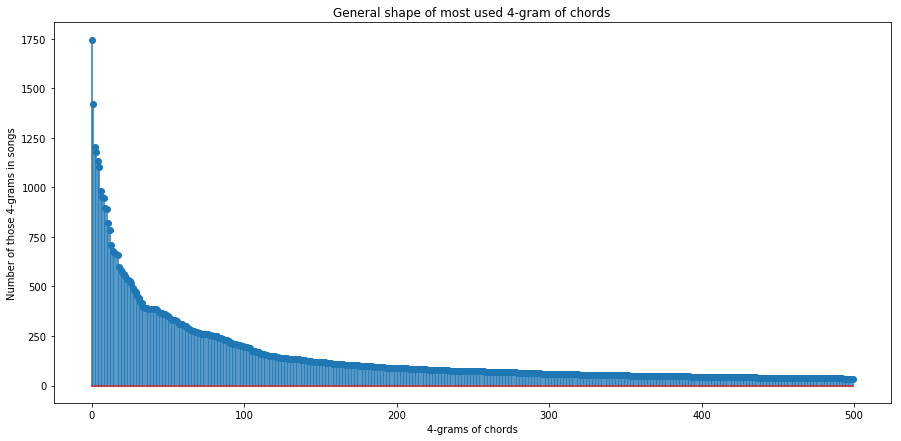

In [89]:
# General function for computing and plotting n-grams

def plot_n_grams(clean_data, ng, n, a=0 ):
    """
    This function computes and plots the n-grams of our clean data.
    clean_data is our input data
    ng is the number of chords we want in our sequences
    n is the number of n-grams we want to plot
    a is the first point you would like to plot
    """
    copyclean=copy.deepcopy(clean_data)
    for elem in copyclean:
        for e in elem[5]:
            e[0]=num2key(e[0])

    ngrams = []
    
    for k in range(890):
        for m in range(copyclean[k][5].shape[0] - ng + 1):
            ngrams.append(tuple([copyclean[k][5][m+o][0] for o in range(ng)]))          

    c_gram = Counter(ngrams)
    mc_grams = [c_gram.most_common(n+a)[k][0] for k in range(a,a+n)]
    mc_grams_counts = [c_gram.most_common(n+a)[k][1] for k in range(a,a+n)]
    
    plt.figure(1, figsize=(15,7))

    plt.stem(np.arange(n),mc_grams_counts)
    plt.xticks(np.arange(n), mc_grams)
    plt.xlabel('{}-grams of chords'.format(ng))
    plt.ylabel('Number of those {}-grams in songs'.format(ng))
    plt.title('Most used {}-gram of chords'.format(ng))
    plt.show()
    
    return ngrams
# General function for computing and plotting n-grams

def plot_n_grams_many(clean_data, ng, n, a=0 ):#cleaner plot for general shape
    """
    This function computes and plots the n-grams of our clean data.
    clean_data is our input data
    ng is the number of chords we want in our sequences
    n is the number of n-grams we want to plot
    a is the first point you would like to plot
    """

    ngrams = []
    
    for k in range(890):
        for m in range(copyclean[k][5].shape[0] - ng + 1):
            ngrams.append(tuple([copyclean[k][5][m+o][0] for o in range(ng)]))          

    c_gram = Counter(ngrams)
    mc_grams = [c_gram.most_common(n+a)[k][0] for k in range(a,a+n)]
    mc_grams_counts = [c_gram.most_common(n+a)[k][1] for k in range(a,a+n)]
    
    plt.figure(1, figsize=(15,7))

    plt.stem(np.arange(n),mc_grams_counts)

    plt.xlabel('{}-grams of chords'.format(ng))
    plt.ylabel('Number of those {}-grams in songs'.format(ng))
    plt.title('General shape of most used {}-gram of chords'.format(ng))
    plt.show()
    
    return ngrams

def plot_n_grams_diff(clean_data, ng, n, a=0 ):#cleaner plot for general shape
    """
    This function computes and plots the n-grams of our clean data.
    clean_data is our input data
    ng is the number of chords we want in our sequences
    n is the number of n-grams we want to plot
    a is the first point you would like to plot
    """

    ngrams = []
    
    for k in range(890):
        for m in range(copyclean[k][5].shape[0] - ng + 1):
            truc=tuple([copyclean[k][5][m+o][0] for o in range(ng)])
            if len(truc)==len(set(truc)): #checks that every chord is different in the ngram
                ngrams.append(truc)

    c_gram = Counter(ngrams)
    mc_grams = [c_gram.most_common(n+a)[k][0] for k in range(a,a+n)]
    mc_grams_counts = [c_gram.most_common(n+a)[k][1] for k in range(a,a+n)]
    
    plt.figure(1, figsize=(15,7))

    plt.stem(np.arange(n),mc_grams_counts)
    plt.xticks(np.arange(n), mc_grams)
    plt.xlabel('{}-grams of chords'.format(ng))
    plt.ylabel('Number of those {}-grams in songs'.format(ng))
    plt.title('most used {}-gram of chords containing different chords'.format(ng))
    plt.show()
    
    return ngrams

ngrams = plot_n_grams(clean_data,4,10)
ngrams = plot_n_grams(clean_data, 4, 10,18)
ngrams = plot_n_grams_diff(clean_data, 4, 10)
ngrams= plot_n_grams_many(clean_data,4,500,2)

NameError: name 'ngrams' is not defined

In [13]:
diff_bigrams = [int(clean_data[k][5][m+1][0]) - int(clean_data[k][5][m][0]) for k in range(890) for m in range(clean_data[k][5].shape[0] - 1) ]

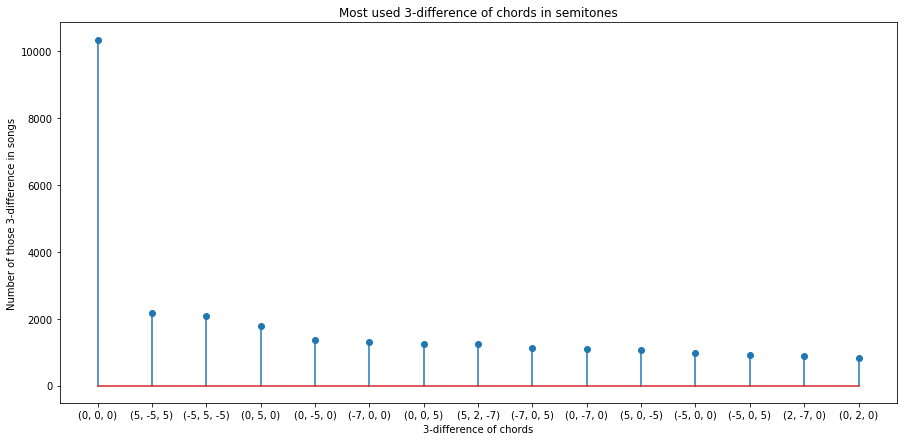

In [71]:
# General function for computing and plotting n-differences

def plot_diff_grams(clean_data, ng, n):
    """
    This function computes and plots the diff-grams of our clean data.
    clean_data is our input data
    ng is the number of chords we want in our sequences
    n is the number of n-grams we want to plot
    """
    
    diffgrams = []
    
    for k in range(890):
        for m in range(clean_data[k][5].shape[0] - ng+1):
            diffgrams.append(tuple([int(clean_data[k][5][m+o+1][0]) - int(clean_data[k][5][m+o][0]) for o in range(ng-1)]))          
    
    c_gram = Counter(diffgrams)

    mc_dgrams = [c_gram.most_common(n)[k][0] for k in range(n)]
    mc_dgrams_counts = [c_gram.most_common(n)[k][1] for k in range(n)]
    
    plt.figure(1, figsize=(15,7))

    plt.stem(np.arange(n),mc_dgrams_counts)
    plt.xticks(np.arange(n), mc_dgrams)
    plt.xlabel('{}-difference of chords'.format(ng-1))
    plt.ylabel('Number of those {}-difference in songs'.format(ng-1))
    plt.title('Most used {}-difference of chords in semitones'.format(ng-1))
    plt.show()
    
    
plot_diff_grams(clean_data, 4, 15)

## General function for computing and plotting n-grams with chord information

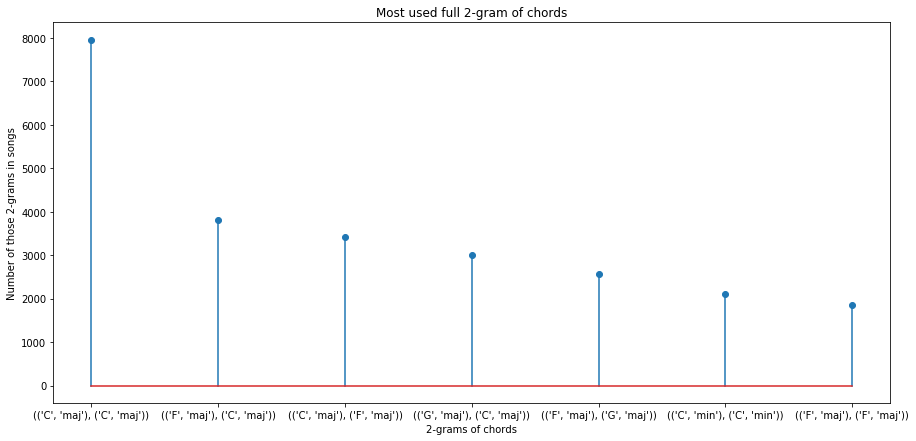

In [75]:
def plot_full_n_grams(clean_data, ng, n):
    
    """
    This function computes and plots the n-grams of our clean data with chord modes.
    clean_data is our input data
    ng is the number of chords we want in our sequences
    n is the number of n-grams we want to plot
    """
    copyclean=copy.deepcopy(clean_data)
    for elem in copyclean:
        for e in elem[5]:
            e[0]=num2key(e[0])
        
    ngrams = []

    for k in range(890):
        for m in range(copyclean[k][5].shape[0] - ng + 1):
            ngrams.append(tuple([((copyclean[k][5][m+o][0]), copyclean[k][5][m+o][1]) for o in range(ng)]))          

    c_gram = Counter(ngrams)
    
    mc_grams = [c_gram.most_common(n)[k][0] for k in range(n)]
    # for k in range(n):
      #   mc_grams.append(tuple([str(c_gram.most_common(n)[k][m][0][0])+', '+c_gram.most_common(n)[k][m][0][1] for m in range(ng)]))
    
    mc_grams_counts = [c_gram.most_common(n)[k][1] for k in range(n)]
    
    plt.figure(1, figsize=(15,7))

    plt.stem(np.arange(n),mc_grams_counts)
    plt.xticks(np.arange(n), mc_grams)
    plt.xlabel('{}-grams of chords'.format(ng))
    plt.ylabel('Number of those {}-grams in songs'.format(ng))
    plt.title('Most used full {}-gram of chords'.format(ng))
    plt.show()
    
    
plot_full_n_grams(clean_data, 2, 7)

# Evolution of popularity of 4-grams containing A, G, C and F over time

In [138]:
from datetime import datetime
year24grams = dict()
# For bigrams, ng = 2
ng=4

for elem in clean_data: # populate empty (to have existing keys)
    year = datetime.strptime(elem[1], '%m/%d/%Y').year
    year24grams[year]=list()
    
for elem in clean_data: # populate for real
    year = datetime.strptime(elem[1], '%m/%d/%Y').year
    
    for m in range(elem[5].shape[0] - ng + 1):
        year24grams[year].append(tuple([int(elem[5][m+o][0]) for o in range(ng)]))

In [139]:
year2chord05 = dict()

#change everything to sets
check={0,5,7,9}
for year in year24grams:
    c=0
    for elem in year24grams[year]:
        otruc=set(elem)
        if otruc==check:
            c+=1
    year2chord05[year] = c / len(year24grams[year])
    
# year2chord05[year]

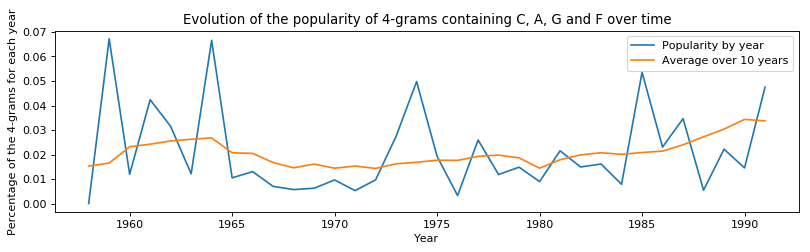

In [141]:
lists = sorted(year2chord05.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.figure(num=None, figsize=(12, 3), dpi=80, facecolor='w', edgecolor='k')
plt.plot(x, y, label="Popularity by year")
plt.plot(x, moving_average(y), label="Average over 10 years")

plt.legend()
plt.xlabel('Year')
plt.ylabel('Percentage of the 4-grams for each year')
plt.title('Evolution of the popularity of 4-grams containing C, A, G and F over time')
plt.show()

# Evolution of popularity of 4-grams containing C and A# over time

In [145]:
from datetime import datetime
year24grams = dict()
# For bigrams, ng = 2
ng=2

for elem in clean_data: # populate empty (to have existing keys)
    year = datetime.strptime(elem[1], '%m/%d/%Y').year
    year24grams[year]=list()
    
for elem in clean_data: # populate for real
    year = datetime.strptime(elem[1], '%m/%d/%Y').year
    
    for m in range(elem[5].shape[0] - ng + 1):
        year24grams[year].append(tuple([int(elem[5][m+o][0]) for o in range(ng)]))

In [146]:
year2chord05 = dict()

#change everything to sets
check={0,10}
for year in year24grams:
    c=0
    for elem in year24grams[year]:
        otruc=set(elem)
        if otruc==check:
            c+=1
    year2chord05[year] = c / len(year24grams[year])
    
# year2chord05[year]

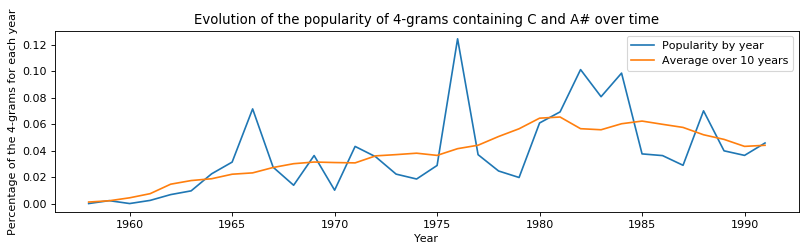

In [148]:
lists = sorted(year2chord05.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.figure(num=None, figsize=(12, 3), dpi=80, facecolor='w', edgecolor='k')
plt.plot(x, y, label="Popularity by year")
plt.plot(x, moving_average(y), label="Average over 10 years")

plt.legend()
plt.xlabel('Year')
plt.ylabel('Percentage of the 4-grams for each year')
plt.title('Evolution of the popularity of 4-grams containing C and A# over time')
plt.show()

# Evolution of popularity of (C,F) bigram over time

In [4]:
from datetime import datetime
year2bigrams = dict()
# For bigrams, ng = 2
ng=2

for elem in clean_data: # populate empty (to have existing keys)
    year = datetime.strptime(elem[1], '%m/%d/%Y').year
    year2fourgrams[year]=list()
    
for elem in clean_data: # populate for real
    year = datetime.strptime(elem[1], '%m/%d/%Y').year
    
    for m in range(elem[5].shape[0] - ng + 1):
        year2fourgrams[year].append(tuple([int(elem[5][m+o][0]) for o in range(ng)]))

In [5]:
year2chord05 = dict()

for year in year2bigrams:
    year2chord05[year] = year2bigrams[year].count(tuple((0,5))) / len(year2bigrams[year])
    
# year2chord05[year]

In [26]:
year2chord05 = dict()

plt.figure(num=None, figsize=(12, 3), dpi=80, facecolor='w', edgecolor='k')
plt.plot(x, y, label="Popularity by year")
plt.plot(x, moving_average(y), label="Average over 10 years")

plt.legend()
plt.xlabel('Year')
plt.ylabel('Percentage of the bigram (0,5) for each year')
plt.title('Evolution of the popularity of the (0,5) bigram over time')
plt.show()

0.06836363636363636

This pattern corresponds to the transition from the Root to the Fourth : this is either an ascending fourth transition or a descending fifth.

# Evolution of popularity of (G, C) bigram over time

In [21]:
from datetime import datetime
year2bigrams = dict()
# For bigrams, ng = 2
ng=2

for elem in clean_data: # populate empty (to have existing keys)
    year = datetime.strptime(elem[1], '%m/%d/%Y').year
    year2bigrams[year]=list()
    
year2chord05[year]

In [22]:
year2chord70 = dict()

for year in year2bigrams:
    year2chord70[year] = year2bigrams[year].count(tuple((7,0))) / len(year2bigrams[year])
    
# year2chord70[year]

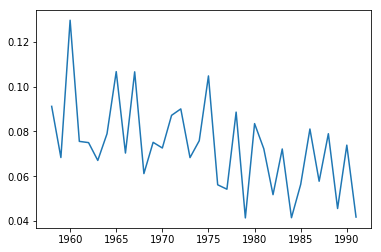

In [32]:
lists = sorted(year2chord70.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.figure(num=None, figsize=(12, 3), dpi=80, facecolor='w', edgecolor='k')
plt.plot(x, y, label="Popularity by year")
plt.plot(x, moving_average(y), label="Average over 10 years")

plt.legend()
plt.xlabel('Year')
plt.ylabel('Percentage of the bigram (G,C) for each year')
plt.title('Evolution of the popularity of the (G,C) bigram over time')
plt.show()

This pattern corresponds to the transition from the Fifth to the Root : this is either a descending fifth transition or an ascending fourth.

# Evolution of the popularity of descending fifths transitions

Note that descending fifths can also correspond to ascending fourths transitions.

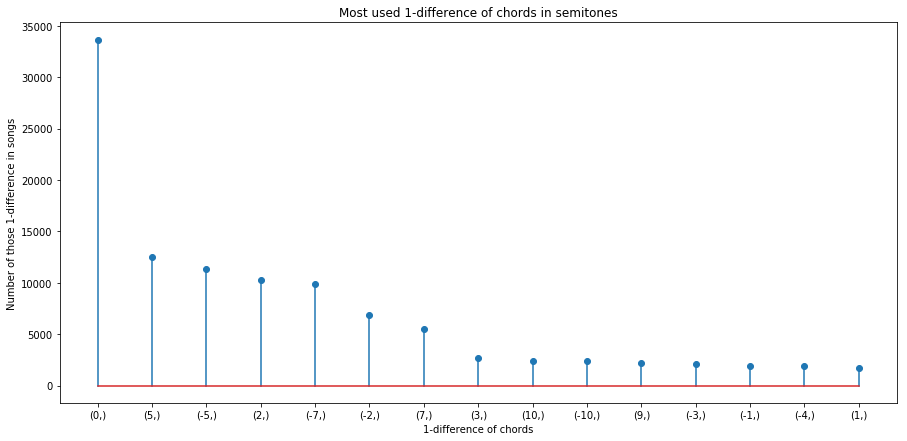

In [18]:
plot_diff_grams(clean_data, 2, 15)

Let us evaluate the popularity of the bigram transition (-7), that is descending fifth or ascending fourth.

In [29]:
from datetime import datetime
year2diff = dict()
# For 1-difference, ng = 2
ng=2

for elem in clean_data: # populate empty (to have existing keys)
    year = datetime.strptime(elem[1], '%m/%d/%Y').year
    year2diff[year]=list()
    
for elem in clean_data: # populate for real
    year = datetime.strptime(elem[1], '%m/%d/%Y').year
    
    for m in range(elem[5].shape[0] - ng + 1):
        year2diff[year].append(int(elem[5][m+1][0]) - int(elem[5][m][0]))

In [30]:
year2diff_7 = dict()

for year in year2bigrams:
    year2diff_7[year] = year2diff[year].count(-7) / len(year2diff[year])

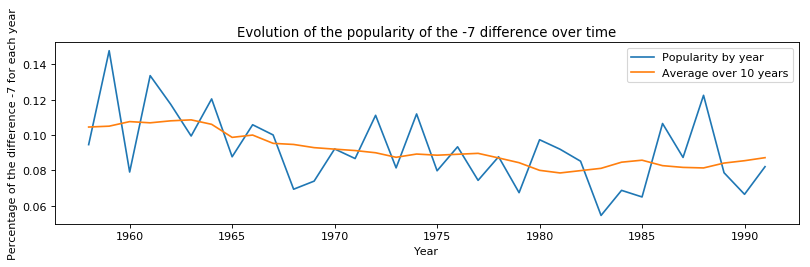

In [33]:
lists = sorted(year2diff_7.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.show()

We see that the curve is quite similar to the one for the (7,0) bigram. However, this curve encompasses more patterns than the (7,0) bigram only : it takes into account all the bigrams of the form (k+7,k) including (7,0).

Globally, the tendency is that the usage of this transition slightly diminishes over time.

# Most popular chords coming from and leading to the Root

In [22]:
bigrams = [(int(clean_data[k][5][m][0]), int(clean_data[k][5][m+1][0])) for k in range(890) for m in range(clean_data[k][5].shape[0] - 1) ]

In [23]:
def chords_leading_root(big, n):
    
    bigrams_to_root = []
    for k in range(len(big)):
        if bigrams[k][1] == 0:
            bigrams_to_root.append(bigrams[k][0])
            
    c_bi_r = Counter(bigrams_to_root)

    mc_bigrams = [c_bi_r.most_common(n)[k][0] for k in range(n)]
    mc_bigrams_counts = [c_bi_r.most_common(n)[k][1] for k in range(n)]
    
    plt.figure(1, figsize=(15,7))

    plt.stem(np.arange(n),mc_bigrams_counts)
    plt.xticks(np.arange(n), mc_bigrams)
    plt.xlabel('Chord leading to the root')
    plt.ylabel('Number of those chords in songs')
    plt.title('Most used chords leading to the root')
    plt.show()

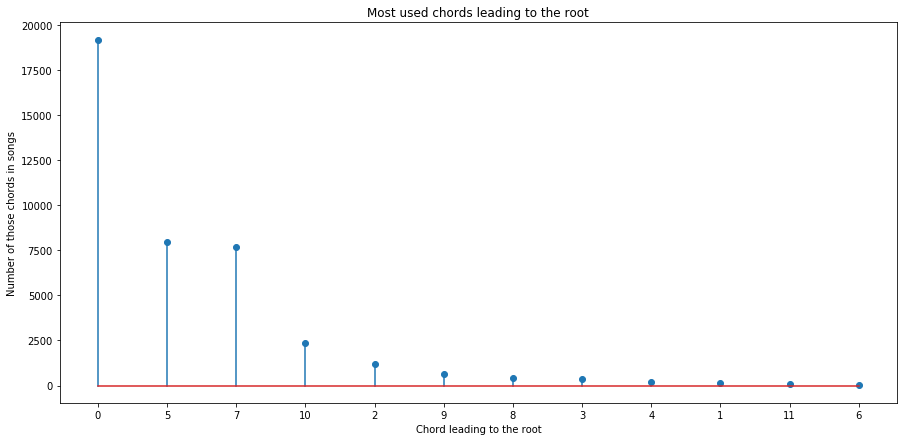

In [24]:
chords_leading_root(bigrams, 12)

Logically, we see that the most frequent chords that lead to a root chord are root chords, fourths and fifths.

After that, we have the minor seventh and the second.

In [25]:
bigrams_from_root = []
for k in range(len(bigrams)):
    if bigrams[k][0] == 0:
        bigrams_from_root.append(bigrams[k][1])

In [26]:
def chords_from_root(big, n):
    
    bigrams_from_root = []
    for k in range(len(big)):
        if bigrams[k][0] == 0:
            bigrams_from_root.append(bigrams[k][1])
            
    c_bi_f = Counter(bigrams_from_root)

    mc_bigrams = [c_bi_f.most_common(n)[k][0] for k in range(n)]
    mc_bigrams_counts = [c_bi_f.most_common(n)[k][1] for k in range(n)]
    
    plt.figure(1, figsize=(15,7))

    plt.stem(np.arange(n),mc_bigrams_counts)
    plt.xticks(np.arange(n), mc_bigrams)
    plt.xlabel('Chord coming from the root')
    plt.ylabel('Number of those chords in songs')
    plt.title('Most used chords coming from the root')
    plt.show()

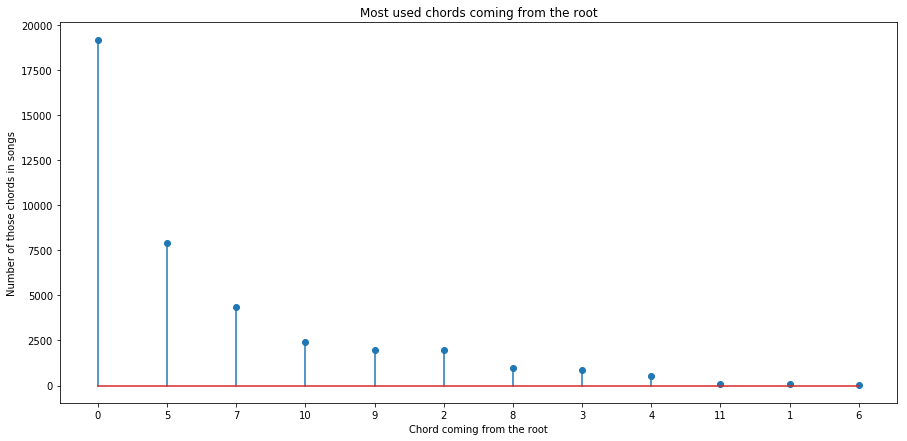

In [27]:
chords_from_root(bigrams, 12)

Same as before : we see the same repartition of chords that come from the root than for the ones leading to the root. 

# Popularity of modes over years

In [97]:
# Modes with their chords : https://en.wikipedia.org/wiki/Roman_numeral_analysis
ionian = np.array(( np.array(('0', "maj")), np.array(('0', "maj7")), np.array(('2', "min")), np.array(('2', "7")),np.array(('4', "min")), np.array(('4', "7")), np.array(('5', "maj")), np.array(('5', "maj7")), np.array(('7', "maj")), np.array(('7', "7")), np.array(('9', "min")), np.array(('9', "7")), np.array(('11', "min")), np.array(('11', "dim")), np.array(('11', "7"))))
dorian = np.array(( np.array(('0', "min")), np.array(('0', "7")), np.array(('2', "min")), np.array(('2', "7")),np.array(('3', "maj")), np.array(('3', "maj7")), np.array(('5', "maj")), np.array(('5', "7")), np.array(('7', "min")), np.array(('7', "7")), np.array(('9', "min")), np.array(('9', "7")), np.array(('10', "maj7")), np.array(('10', "maj"))))
phrygian = np.array(( np.array(('0', "min")), np.array(('0', "7")), np.array(('1', "maj")), np.array(('1', "maj7")),np.array(('3', "maj")), np.array(('3', "7")), np.array(('5', "min")), np.array(('5', "7")), np.array(('7', "min")), np.array(('7', "7")), np.array(('8', "maj")), np.array(('8', "maj7")), np.array(('10', "min")), np.array(('10', "7"))))
lydian = np.array(( np.array(('0', "maj")), np.array(('0', "maj7")), np.array(('2', "maj")), np.array(('2', "maj7")),np.array(('4', "min")), np.array(('4', "7")), np.array(('6', "min")), np.array(('6', "7")), np.array(('7', "maj")), np.array(('7', "maj7")), np.array(('9', "min")), np.array(('9', "7")), np.array(('11', "min")), np.array(('11', "7"))))
mixolydian = np.array(( np.array(('0', "maj")), np.array(('0', "7")), np.array(('2', "min")), np.array(('2', "7")),np.array(('4', "min")),np.array(('4', "dim")), np.array(('4', "7")), np.array(('5', "maj")), np.array(('5', "maj7")), np.array(('7', "min")), np.array(('7', "7")), np.array(('9', "min")), np.array(('9', "7")), np.array(('10', "maj")), np.array(('10', "maj7"))))
aeolian = np.array(( np.array(('0', "min")), np.array(('0', "7")), np.array(('2', "min")), np.array(('2', "7")), np.array(('2', "dim")), np.array(('3', "maj")), np.array(('3', "maj7")), np.array(('5', "min")), np.array(('5', "7")), np.array(('7', "min")), np.array(('7', "7")), np.array(('8', "maj")), np.array(('8', "maj7")), np.array(('10', "maj")), np.array(('10', "maj7"))))
locrian = np.array(( np.array(('0', "min")), np.array(('0', "dim")), np.array(('0', "7")), np.array(('1', "maj")), np.array(('1', "maj7")),np.array(('3', "min")), np.array(('3', "7")), np.array(('5', "min")), np.array(('5', "7")), np.array(('6', "maj")), np.array(('6', "maj7")), np.array(('8', "maj")), np.array(('8', "maj7")), np.array(('10', "min")), np.array(('10', "7"))))

allmode=np.concatenate((ionian,dorian,phrygian,lydian,mixolydian,aeolian,locrian),axis=0)

# Data structure conversion
ionian = list(map(tuple, ionian))
dorian = list(map(tuple, dorian))
phrygian = list(map(tuple, phrygian))
lydian = list(map(tuple, lydian))
mixolydian = list(map(tuple, mixolydian))
aeolian = list(map(tuple, aeolian))
locrian = list(map(tuple, locrian))

In [98]:
def song_mode(chords, mode):
    '''
    Function to compute proportion of chords in a song, that belong to the given mode.
    '''
    match_chords = 0
    for chord in chords:
        if(chord in mode):
            match_chords += 1

    return match_chords/len(chords)

def year2mode(clean_data, mode):
    '''
    Function to compute the average % utilisation of a mode over the years
    '''
    from datetime import datetime
    year2ionian = dict()

    for elem in clean_data: # populate empty (to have existing keys)
        year = datetime.strptime(elem[1], '%m/%d/%Y').year
        year2ionian[year]=list()

    for elem in clean_data: # populate for real
        year = datetime.strptime(elem[1], '%m/%d/%Y').year
        year2ionian[year].append(song_mode(list(map(tuple, elem[5])), mode))

    for year in year2ionian: # computing the means for each year
        year2ionian[year] = np.mean(year2ionian[year])
        
    return year2ionian

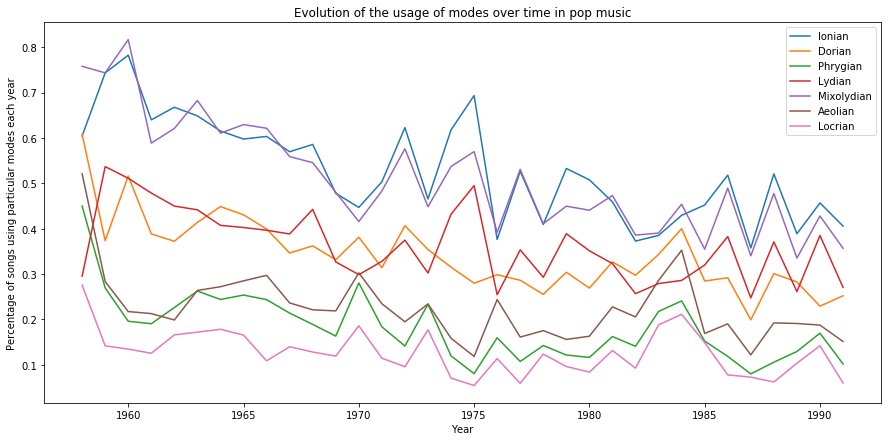

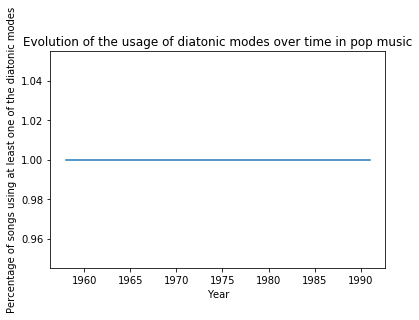

In [100]:
# Dictionaries of year to mode proportions
year2ionian = year2mode(clean_data, ionian)
year2dorian = year2mode(clean_data, dorian)
year2phrygian = year2mode(clean_data, phrygian)
year2lydian = year2mode(clean_data, lydian)
year2mixolydian = year2mode(clean_data, mixolydian)
year2aeolian = year2mode(clean_data, aeolian)
year2locrian = year2mode(clean_data, locrian)

year2all=year2mode(clean_data, allmode)
    
# plotting
plt.figure(1, figsize=(15,7))

lists = sorted(year2ionian.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.plot(x, y, label='Ionian')

lists = sorted(year2dorian.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.plot(x, y, label='Dorian')

lists = sorted(year2phrygian.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.plot(x, y, label='Phrygian')

lists = sorted(year2lydian.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.plot(x, y, label='Lydian')

lists = sorted(year2mixolydian.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.plot(x, y, label='Mixolydian')

lists = sorted(year2aeolian.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.plot(x, y, label='Aeolian')

lists = sorted(year2locrian.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.plot(x, y, label='Locrian')

plt.legend()
plt.xlabel('Year')
plt.ylabel('Percentage of songs using particular modes each year')
plt.title('Evolution of the usage of modes over time in pop music')
plt.show()

lists = sorted(year2all.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.plot(x, y)

plt.legend()
plt.xlabel('Year')
plt.ylabel('Percentage of songs using at least one of the diatonic modes')
plt.title('Evolution of the usage of all modes over time in pop music')
#plt.show()

# Are songs becoming less major, less minor (diatonically speaking, not caring about chords) ?

In [22]:
major = list(('0', '2', '4', '5', '7', '9', '11'))
minor = list(('0', '2', '3', '5', '7', '9', '10'))
majorminor = list(('0', '2', '3', '4', '5', '7', '9', '10', '11'))

In [20]:
def song_majmin(chords, mode):
    '''
    Function to compute proportion of chords not in given major/minor scheme
    '''
    match_chords = 0
    for chord in chords:
        if(chord[0] not in mode):
            match_chords += 1

    return match_chords/len(chords)

def year2majmin(clean_data, mode):
    '''
    Function to compute the average % utilisation of a maj/min over the years
    '''
    from datetime import datetime
    year2ionian = dict()

    for elem in clean_data: # populate empty (to have existing keys)
        year = datetime.strptime(elem[1], '%m/%d/%Y').year
        year2ionian[year]=list()

    for elem in clean_data: # populate for real
        year = datetime.strptime(elem[1], '%m/%d/%Y').year
        year2ionian[year].append(song_majmin(list(map(tuple, elem[5])), mode))

    for year in year2ionian: # computing the means for each year
        year2ionian[year] = np.mean(year2ionian[year])
        
    return year2ionian

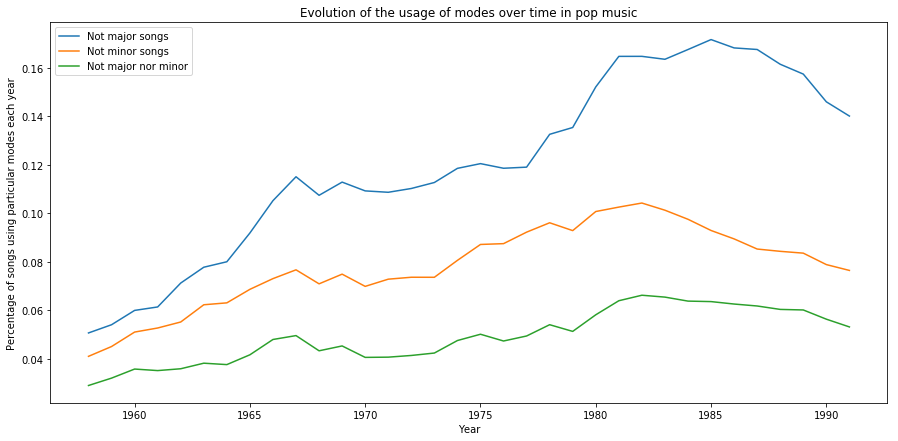

In [27]:
# Dictionaries of year to mode proportions
year2notmajor = year2majmin(clean_data, major)
year2notminor = year2majmin(clean_data, minor)
year2notmajorminor = year2majmin(clean_data, majorminor)

# plotting
plt.figure(1, figsize=(15,7))

lists = sorted(year2notmajor.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.plot(x, moving_average(y), label='Not major songs')

lists = sorted(year2notminor.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.plot(x, moving_average(y), label='Not minor songs')

lists = sorted(year2notmajorminor.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.plot(x, moving_average(y), label='Neither major nor minor')


plt.legend()
plt.xlabel('Year')
plt.ylabel('Percentage of songs using particular modes each year')
plt.title('Evolution of the usage of modes over time in pop music')
plt.show()

less major YES, but less minor bof bof

# Pattern Extractor (not functional)

In [ ]:
# Verse and chorus chord pattern extraction:

#we compute all ngrams possible up to n=12, then among ngrams which are the most common, we save the ones with the highest n.
#chorus chords become chorus ngrams

allpatterns=[]
for elem in clean_data:
    ngrams = []
    #we first do it for chorus:
    
    for i in range(2,elem[6].shape[0]):
        for m in range(elem[6].shape[0] - i + 1):
            ngrams.append(tuple([(int(elem[6][m+o][0]), elem[6][m+o][1]) for o in range(i)])) 
    
    c_gram = Counter(ngrams)
    
    if (not ngrams):
        theones = []
    else:
        theones=[ngrams[0]]
        for ngram in ngrams:
            if len(ngram) == len(theones[0]) and c_gram[ngram] == c_gram[theones[0]] and ngram != theones[0]:
                theones.append((ngram, c_gram[ngram]))
            if (len(ngram) > len(theones[0]) and c_gram[ngram] > 1) or (c_gram[ngram] > c_gram[theones[0]] and len(ngram) == len(theones[0])): #we keep only highest if it is stricly higher
                theones = [ngram, c_gram[ngram]]
    allpatterns.append(theones) #we save all patterns 
    
    #then we do it for verses (separately, but we add everything to allpatterns)
    ngrams = [] #we reset the ngrams for each song
    for i in range(2,elem[7].shape[0]):
        for m in range(elem[7].shape[0] - i + 1):
            ngrams.append(tuple([(int(elem[7][m+o][0]), elem[7][m+o][1]) for o in range(i)])) 
    
    c_gram = Counter(ngrams)
    
    if (not ngrams): #if we do not have any ngrams, (most likely no verse or chorus)
        theones = []
    else:
        theones=[ngrams[0]]
        for ngram in ngrams:
            if len(ngram) == len(theones[0]) and c_gram[ngram] == c_gram[theones[0]] and ngram != theones[0]:
                theones.append((ngram, c_gram[ngram]))
            if (len(ngram) > len(theones[0]) and c_gram[ngram] > 1) or (c_gram[ngram] > c_gram[theones[0]] and len(ngram) == len(theones[0])): #we keep only highest if it is stricly higher
                theones = [ngram, c_gram[ngram]]
    allpatterns.append(theones) #we save all patterns 

#we check that our pattern extractor works on a simple example (song number 25)
print(clean_data[12])
print(allpatterns[12]) #in all patterns, the chorus pattern is saved at the song's index and the verse patterns at the song index +890
print(allpatterns[12+890])
#print(allpatterns)

#we look for the most common patterns across verses and chorus: 
#for elem in allpatterns:
    
countpatterns = Counter(allpatterns)
print(countpatterns.most_common(10))